# 📊 *Análisis de Ventas Retail - Superstore Dataset*

---

**Autor:** Bryan Coronado  
**Fecha:** Enero 2026  
**Dataset:** Superstore Sales (2014-2017)

---

## 🎯 Objetivos del Proyecto

Este proyecto realiza un análisis completo de datos de ventas retail con los siguientes objetivos:

1. **Análisis Exploratorio:** Identificar patrones, tendencias y anomalías en los datos
2. **Análisis de Rentabilidad:** Determinar productos, categorías y regiones más rentables
3. **Segmentación de Clientes:** Analizar el comportamiento de diferentes segmentos
4. **Análisis Temporal:** Identificar estacionalidad y tendencias temporales
5. **Modelo Predictivo:** Desarrollar modelo de Machine Learning para predecir rentabilidad

---
<a id='0'></a>
## 📋 *Tabla de Contenidos*

1. [Importación de Librerías](#1)
2. [Carga y Exploración Inicial de Datos](#2)
3. [Limpieza y Transformación de Datos](#3)
4. [Análisis Exploratorio de Datos (EDA)](#4)
   - 4.1 [Análisis de Ventas y Ganancias](#4-1)
   - 4.2 [Análisis por Categoría y Subcategoría](#4-2)
   - 4.3 [Análisis Geográfico](#4-3)
   - 4.4 [Análisis Temporal](#4-4)
   - 4.5 [Análisis de Clientes](#4-5)
   - 4.6 [Análisis de Descuentos](#4-6)
5. [Feature Engineering](#5)
6. [Modelado Predictivo](#6)
7. [Conclusiones y Recomendaciones](#7)

---

---
<a id='1'></a>
## 1. 📝 Importación de librerías [⬆](#0)

In [3]:
# ============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ============================================================================

# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis estadístico
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

# Utilidades
import warnings
from datetime import datetime

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas exitosamente")
print(f"Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Librerías importadas exitosamente
Fecha de ejecución: 2026-02-04 15:20:21


---
<a id='2'></a>
## 2. 📂 Carga y Exploración Inicial de Datos [⬆](#0)

In [4]:
# ============================================================================
# 2. CARGA DE DATOS
# ============================================================================

# Cargar el dataset
df = pd.read_csv('../data/raw/superstore_sales_utf8.csv')

print("-" * 33)
print("DATASET CARGADO EXITOSAMENTE ✅")
print("-" * 33)

# Información básica
print(f"\nDimensiones del dataset:")
print(f"   • Registros (filas): {df.shape[0]:,}")
print(f"   • Variables (columnas): {df.shape[1]}")

print(f"\nColumnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

---------------------------------
DATASET CARGADO EXITOSAMENTE ✅
---------------------------------

Dimensiones del dataset:
   • Registros (filas): 9,994
   • Variables (columnas): 21

Columnas del dataset:
    1. Row ID
    2. Order ID
    3. Order Date
    4. Ship Date
    5. Ship Mode
    6. Customer ID
    7. Customer Name
    8. Segment
    9. Country
   10. City
   11. State
   12. Postal Code
   13. Region
   14. Product ID
   15. Category
   16. Sub-Category
   17. Product Name
   18. Sales
   19. Quantity
   20. Discount
   21. Profit


In [5]:
# Primeras filas
print("-" * 40)
print("Primeras 5 filas del dataset:")
print("-" * 40)
display(df.head())

# Últimas filas
print("-" * 40)
print("Últimas 5 filas del dataset:")
print("-" * 40)
display(df.tail())

----------------------------------------
Primeras 5 filas del dataset:
----------------------------------------


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


----------------------------------------
Últimas 5 filas del dataset:
----------------------------------------


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.00,13.32
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.00,72.95


In [6]:
# ============================================================================
# INFORMACIÓN DETALLADA DEL DATASET
# ============================================================================

# Info general
print("\nTipos de datos y valores no nulos:")
df.info()


Tipos de datos y valores no nulos:
<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   str    
 2   Order Date     9994 non-null   str    
 3   Ship Date      9994 non-null   str    
 4   Ship Mode      9994 non-null   str    
 5   Customer ID    9994 non-null   str    
 6   Customer Name  9994 non-null   str    
 7   Segment        9994 non-null   str    
 8   Country        9994 non-null   str    
 9   City           9994 non-null   str    
 10  State          9994 non-null   str    
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   str    
 13  Product ID     9994 non-null   str    
 14  Category       9994 non-null   str    
 15  Sub-Category   9994 non-null   str    
 16  Product Name   9994 non-null   str    
 17  Sales          9994 non-nul

In [7]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS
# ============================================================================

# Estadísticas de variables numéricas
print("\nVariables numéricas:")
display(df.describe())

# Estadísticas de variables categóricas
print("\nVariables categóricas:")
categorical_cols = df.select_dtypes(include=['object']).columns
cat_stats = pd.DataFrame({
    'Columna': categorical_cols,
    'Valores Únicos': [df[col].nunique() for col in categorical_cols],
    'Valor Más Frecuente': [df[col].mode()[0] if len(df[col].mode()) > 0 else None for col in categorical_cols],
    'Frecuencia': [df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0 for col in categorical_cols]
})

display(cat_stats)


Variables numéricas:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,55190.38,229.86,3.79,0.16,28.66
std,2885.16,32063.69,623.25,2.23,0.21,234.26
min,1.00,1040.00,0.44,1.00,0.00,-6599.98
25%,2499.25,23223.00,17.28,2.00,0.00,1.73
50%,4997.50,56430.50,54.49,3.00,0.20,8.67
75%,7495.75,90008.00,209.94,5.00,0.20,29.36
max,9994.00,99301.00,22638.48,14.00,0.80,8399.98



Variables categóricas:


,Columna,Valores Únicos,Valor Más Frecuente,Frecuencia
0,Order ID,5009,CA-2017-100111,14
1,Order Date,1237,9/5/2016,38
2,Ship Date,1334,12/16/2015,35
3,Ship Mode,4,Standard Class,5968
4,Customer ID,793,WB-21850,37
5,Customer Name,793,William Brown,37
6,Segment,3,Consumer,5191
7,Country,1,United States,9994
8,City,531,New York City,915
9,State,49,California,2001


In [8]:
# ============================================================================
# VERIFICACIÓN DE CALIDAD DE DATOS
# ============================================================================

# Valores nulos
print("Verificación de valores nulos:")
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
})

if null_counts.sum() > 0:
    print(null_summary[null_summary['Valores Nulos'] > 0])
else:
    print("✅ No hay valores nulos en el dataset")

# Duplicados
print(f"\nVerificación de registros duplicados:")
duplicates = df.duplicated().sum()
print(f"• Registros duplicados: {duplicates:,}")
if duplicates > 0:
    print(f"• Porcentaje: {(duplicates/len(df)*100):.2f}%")
else:
    print("✅ No hay registros duplicados")

# Resumen de calidad
print(f"\nResumen de calidad:")
print(f"• Dataset completo: {'✅ Sí' if null_counts.sum() == 0 else '⚠️ No'}")
print(f"• Sin duplicados: {'✅ Sí' if duplicates == 0 else '⚠️ No'}")
print(f"• Calidad general: {'🟢 Excelente' if null_counts.sum() == 0 and duplicates == 0 else '🟡 Buena'}")

Verificación de valores nulos:
✅ No hay valores nulos en el dataset

Verificación de registros duplicados:
• Registros duplicados: 0
✅ No hay registros duplicados

Resumen de calidad:
• Dataset completo: ✅ Sí
• Sin duplicados: ✅ Sí
• Calidad general: 🟢 Excelente


---
<a id='3'></a>
## 3. 🔧 Limpieza y Transformación de Datos [⬆](#0)

In [9]:
# ============================================================================
# TRANSFORMACIÓN DE FECHAS
# ============================================================================

# Conversión de formatos fecha 'string' a 'datetime'
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')

# Verificación después de la conversión
print('-' * 40)
print("- Tipos de datos después de la conversión:")
print('-' * 40)
print(df[['Order Date', 'Ship Date']].dtypes)

# Variables temporales
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day_of_Week'] = df['Order Date'].dt.dayofweek
df['Month_Name'] = df['Order Date'].dt.month_name()
df['Quarter'] = df['Order Date'].dt.quarter

# Columna para calcular tiempo de entrega en envíos
df['Shipping_Days'] = df['Ship Date'] - df['Order Date']

# Verificación de columnas nuevas
print('\n', '-' * 30)
print('Columnas nuevas añadidas:')
print('-' * 30)
display(df[['Year', 'Month', 'Day_of_Week', 'Month_Name', 'Quarter', 'Shipping_Days']].head(5))

# Verificación de columna de tiempo de entrega
print('-' * 32)
print('¿Tiempos de entrega?')
print('-' * 32)
print(f'Tiempo mínimo de entrega: {df['Shipping_Days'].dt.days.min()} días')
print(f'Tiempo máximo de entrega: {df['Shipping_Days'].dt.days.max()} días')
print(f'Días promedio de entrega: {round(df['Shipping_Days'].dt.days.mean(),)} días')

----------------------------------------
- Tipos de datos después de la conversión:
----------------------------------------
Order Date    datetime64[us]
Ship Date     datetime64[us]
dtype: object

 ------------------------------
Columnas nuevas añadidas:
------------------------------


,Year,Month,Day_of_Week,Month_Name,Quarter,Shipping_Days
0,2016,11,1,November,4,3 days
1,2016,11,1,November,4,3 days
2,2016,6,6,June,2,4 days
3,2015,10,6,October,4,7 days
4,2015,10,6,October,4,7 days


--------------------------------
¿Tiempos de entrega?
--------------------------------
Tiempo mínimo de entrega: 0 días
Tiempo máximo de entrega: 7 días
Días promedio de entrega: 4 días


---
<a id='4'></a>
## 4. 📊 Análisis Exploratorio de Datos (EDA) [⬆](#0)

<a id='4-1'></a>
### 4.1 Análisis de Ventas y Ganancias

In [10]:
# ============================================================================
# 4.1 MÉTRICAS CLAVE
# ============================================================================

print("-" * 70)
print("MÉTRICAS CLAVE DEL NEGOCIO (2014-2017)")
print("-" * 70)

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100
total_orders = df.shape[0] # ó len(df)
unique_customers = df['Customer ID'].nunique()
avg_ticket = total_sales / total_orders

# Resultados
print(f"\n VENTAS:")
print(f"   Total: ${total_sales:,.2f}")
print(f"   Ticket promedio: ${avg_ticket:,.2f}")

print(f"\n RENTABILIDAD:")
print(f"   Ganancia total: ${total_profit:,.2f}")
print(f"   Margen promedio: {avg_margin:.2f}%")

print(f"\n CLIENTES:")
print(f"   Pedidos totales: {total_orders:,}")
print(f"   Clientes únicos: {unique_customers:,}")
print(f"   Pedidos por cliente: {total_orders/unique_customers:.2f}")

print("-" * 70)

----------------------------------------------------------------------
MÉTRICAS CLAVE DEL NEGOCIO (2014-2017)
----------------------------------------------------------------------

 VENTAS:
   Total: $2,297,200.86
   Ticket promedio: $229.86

 RENTABILIDAD:
   Ganancia total: $286,397.02
   Margen promedio: 12.47%

 CLIENTES:
   Pedidos totales: 9,994
   Clientes únicos: 793
   Pedidos por cliente: 12.60
----------------------------------------------------------------------


---
<a id='4-2'></a>
### 4.2 Análisis por Categoría y Subcategoría

----------------------------------------------------------------------
ANÁLISIS POR CATEGORÍA DE PRODUCTO
----------------------------------------------------------------------

Resumen por Categoría:


,Category,Total_Sales,Total_Profit,Num_Orders,Margin
2,Technology,836154.03,145454.95,1847,17.40
1,Office Supplies,719047.03,122490.80,6026,17.04
0,Furniture,741999.80,18451.27,2121,2.49



TOP DESEMPEÑO:
   Categoría más rentable: Technology
   Ganancia: $145,454.95
   Margen: 17.40%

----------------------------------------------------------------------
         VISUALIZACION GRAFICA
----------------------------------------------------------------------


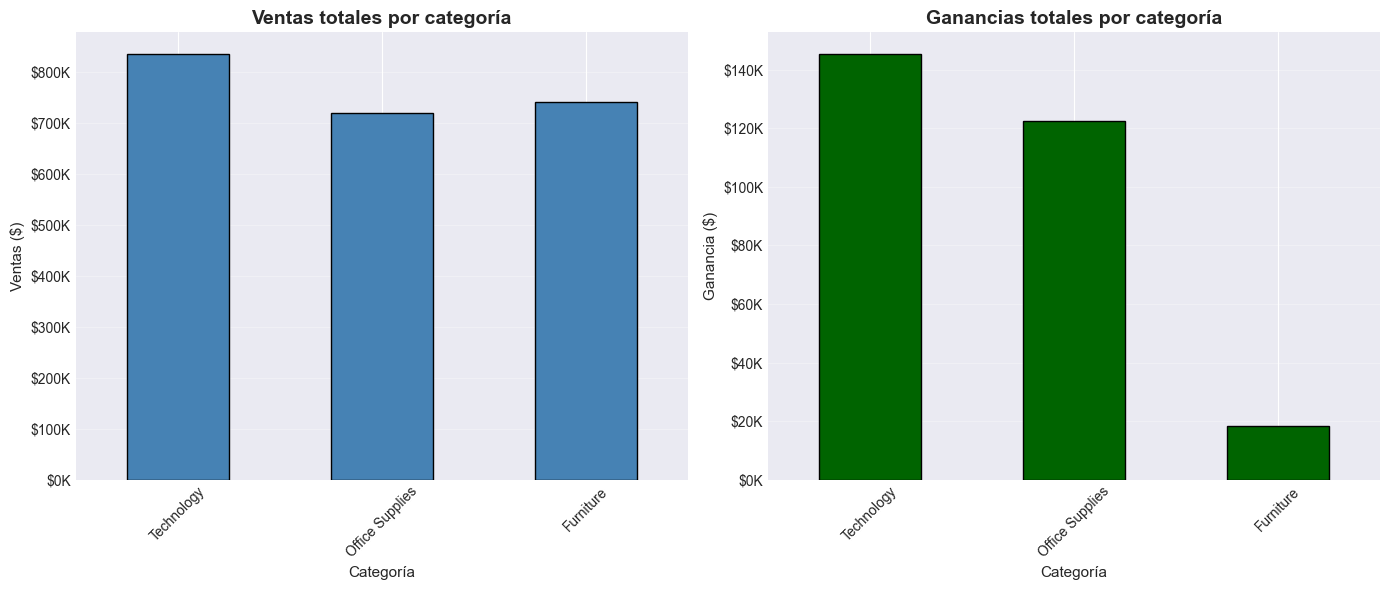

In [ ]:
# ============================================================================
# 4.2.1 ANÁLISIS POR CATEGORÍA
# ============================================================================

print("-" * 70)
print("ANÁLISIS POR CATEGORÍA DE PRODUCTO")
print("-" * 70)

# Agrupar por categoría y calcular métricas
df_category = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).reset_index()

# Renombrar columnas para claridad
df_category.columns = ['Category', 'Total_Sales', 'Total_Profit', 'Num_Orders']

# Calcular margen de ganancia
df_category['Margin'] = (df_category['Total_Profit'] / df_category['Total_Sales']) * 100

# Ordenar por ganancia total (descendente)
df_category = df_category.sort_values('Total_Profit', ascending=False)

# Resultados
print("\nResumen por Categoría:")
display(df_category)

# Análisis adicional
print("\nTOP DESEMPEÑO:")
top_category = df_category.iloc[0]
print(f"   Categoría más rentable: {top_category['Category']}")
print(f"   Ganancia: ${top_category['Total_Profit']:,.2f}")
print(f"   Margen: {top_category['Margin']:.2f}%")

# ======================================================================
# ======================================================================

print("\n" + "-" * 70)
print("         VISUALIZACION GRAFICA")
print("-" * 70)

fig, axes = plt.subplots(1,2, figsize=(14,6))

# Primer gráfico (Ventas Por Categoría)
df_category.plot(x='Category', y='Total_Sales', kind='bar', ax=axes[0], color='steelblue', edgecolor='black', legend=False)
axes[0].set_title('Ventas totales por categoría', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Categoría', fontsize=11)
axes[0].set_ylabel('Ventas ($)', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K')) # Formatear eje Y con formato de moneda

# Primer gráfico (Ganancias Por Categoría)
df_category.plot(x='Category', y='Total_Profit', kind='bar', ax=axes[1], color='darkgreen', edgecolor='black', legend=False)
axes[1].set_title('Ganancias totales por categoría', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Categoría', fontsize=11)
axes[1].set_ylabel('Ganancia ($)', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K')) # Formatear eje Y con formato de moneda

plt.tight_layout()
plt.savefig('../images/categoria_ventas_ganancias.png', dpi=300, bbox_inches='tight')
plt.show()

----------------------------------------------------------------------
ANÁLISIS POR SUB-CATEGORÍA DE PRODUCTO
----------------------------------------------------------------------
SUB-CATEGORÍAS MAS RENTABLES:


,Subcategory,Total_Sales,Total_Profit,Num_Orders,Margin
6,Copiers,149528.03,55617.82,68,37.20
13,Phones,330007.05,44515.73,889,13.49
0,Accessories,167380.32,41936.64,775,25.05
12,Paper,78479.21,34053.57,1370,43.39
3,Binders,203412.73,30221.76,1523,14.86
5,Chairs,328449.10,26590.17,617,8.10
14,Storage,223843.61,21278.83,846,9.51
1,Appliances,107532.16,18138.01,466,16.87
9,Furnishings,91705.16,13059.14,957,14.24
7,Envelopes,16476.40,6964.18,254,42.27


SUB-CATEGORÍAS MENOS RENTABLES:


,Subcategory,Total_Sales,Total_Profit,Num_Orders,Margin
11,Machines,189238.63,3384.76,115,1.79
8,Fasteners,3024.28,949.52,217,31.40
15,Supplies,46673.54,-1189.10,190,-2.55
4,Bookcases,114880.00,-3472.56,228,-3.02
16,Tables,206965.53,-17725.48,319,-8.56



----------------------------------------------------------------------
         VISUALIZACION GRAFICA DEL TOP DE SUB-CATEGORIAS
----------------------------------------------------------------------


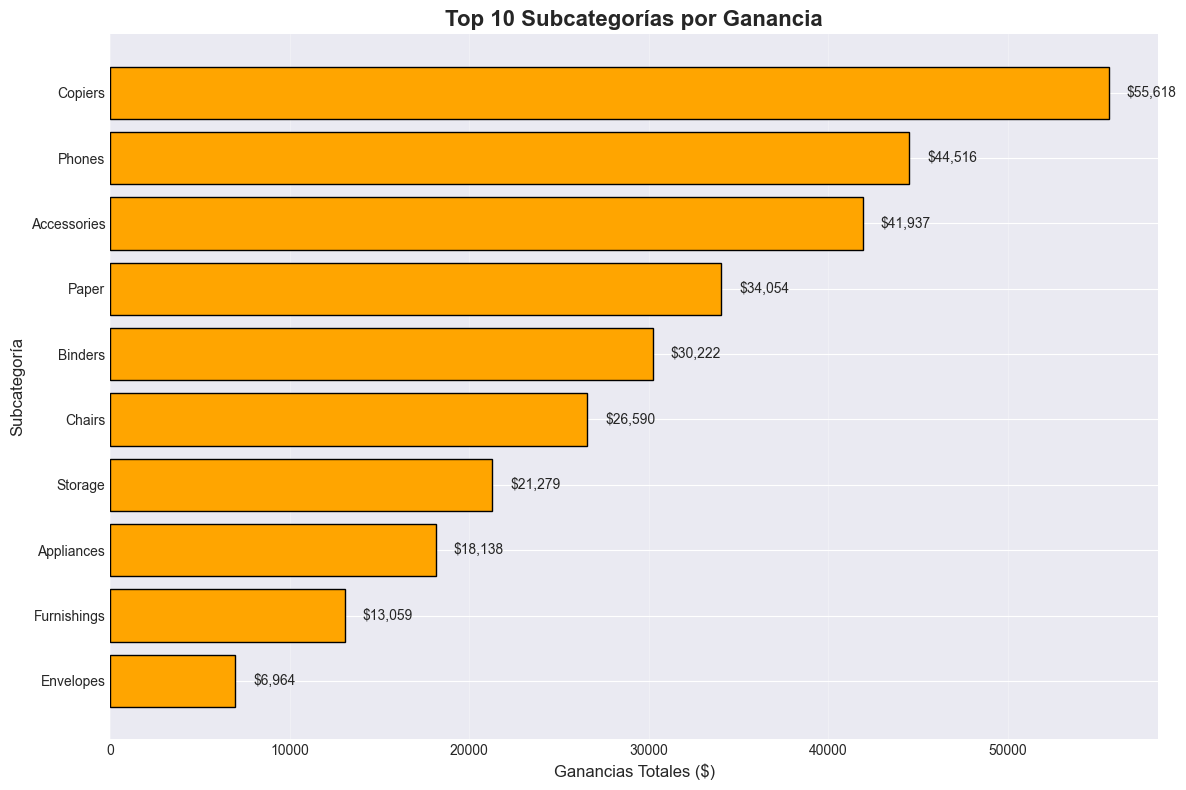

In [ ]:
# ============================================================================
# 4.2.2 ANÁLISIS POR SUB-CATEGORÍA
# ============================================================================

print("-" * 70)
print("ANÁLISIS POR SUB-CATEGORÍA DE PRODUCTO")
print("-" * 70)

df_subcategory = df.groupby('Sub-Category').agg({
    'Sales' : 'sum',
    'Profit' : 'sum',
    'Order ID' : 'count'
}).reset_index()

# Renombrado de columnas
df_subcategory.columns = ['Subcategory', 'Total_Sales', 'Total_Profit', 'Num_Orders']

# Calculado de margenes
df_subcategory['Margin'] = (df_subcategory['Total_Profit'] / df_subcategory['Total_Sales']) * 100

# Ordenado por ganancias obtenidas
df_subcategory = df_subcategory.sort_values('Total_Profit', ascending=False)

# Resultados
print('SUB-CATEGORÍAS MAS RENTABLES:')
display(df_subcategory.head(10))

print('SUB-CATEGORÍAS MENOS RENTABLES:')
display(df_subcategory.tail(5))

# ======================================================================
# ======================================================================

print("\n" + "-" * 70)
print("         VISUALIZACION GRAFICA DEL TOP DE SUB-CATEGORIAS")
print("-" * 70)

# Se toma el top 10 del DataFrame de sub-categorías
top_10_sub = df_subcategory.head(10)

plt.figure(figsize=(12,8))
plt.barh(top_10_sub['Subcategory'], top_10_sub['Total_Profit'], color='orange', edgecolor='black')
plt.gca().invert_yaxis() # Inversión del eje Y
plt.title('Top 10 Subcategorías por Ganancia', fontsize=16, fontweight='bold')
plt.xlabel('Ganancias Totales ($)', fontsize=12)
plt.ylabel('Subcategoría', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Agregado de valores en las barras
for i, v in enumerate(top_10_sub['Total_Profit']):
    plt.text(v + 1000, i, f'${v:,.0f}', va='center', fontsize=10)
    
plt.tight_layout()
plt.savefig('../images/top_subcategorias.png', dpi=300, bbox_inches='tight')
plt.show()